In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from JP_Cache import get_cached_or_dl

#added this because it's indicated as useful but not imported
import urllib
from zipfile import ZipFile
from io import BytesIO
import os
import json
from bs4 import BeautifulSoup as bs
import re

from matplotlib import animation, rc
from IPython.display import display, HTML
import sys
import urllib
import urllib.request
from urllib.request import urlretrieve

import json

In [2]:
files = ["https://www.huduser.gov/portal/datasets/fmr/fmr2010f/FY2010_4050_Final_PostRDDs.xls",
         "https://www.huduser.gov/portal/datasets/fmr/fmr2011f/fy2011_equiv_zc_rents_acs.xls",
         "https://www.huduser.gov/portal/datasets/fmr/fmr2012f/small_area_fmrs_fy2012.xls",
         "https://www.huduser.gov/portal/datasets/fmr/fmr2013p/small_area_fmrs_fy2013.xls",
         "https://www.huduser.gov/portal/datasets/fmr/fmr2014f/small_area_fmrs_fy2014.xls"]       

In [3]:
def yearly_spreedsheet(file):
    f    = (file)
    data = pd.read_excel(f)
    return (data)
df_10 = yearly_spreedsheet(files[0])
df_11 = yearly_spreedsheet(files[1])
df_12 = yearly_spreedsheet(files[2])
df_13 = yearly_spreedsheet(files[3])
df_14 = yearly_spreedsheet(files[4])

In [4]:
#Simple package for dealing with zip codes in python.
#you need to install it in your terminal as follows
#pip install zipcode
import zipcode
myzip = zipcode.isequal('11385')
myzip.state     
myzip.city    

'RIDGEWOOD'

In [5]:
#save the data in array inorder to modify some attributes 
rent_per_year = [df_10,df_11,df_12,df_13,df_14]
for i in range(len(rent_per_year)):
    for j in rent_per_year[i].columns.values:
        if j == 'zip' or j == 'ZIP':
            rent_per_year[i].rename(columns={j: 'ZIP' }, inplace=True)
        if j == 'countyname' or j == 'County Name' or j == 'County_Name':
            rent_per_year[i].rename(columns={j: 'CountyName' }, inplace=True)
        if j == 'State Name' or j == 'state_alpha':
            rent_per_year[i].rename(columns={j: 'StateName' }, inplace=True)
        if j == 'area_rent_br0' or j == 'fmr0':
            rent_per_year[i].rename(columns={j: 'rent0' }, inplace=True)
        if j == 'area_rent_br1' or j == 'fmr1':
            rent_per_year[i].rename(columns={j: 'rent1' }, inplace=True)
        if j == 'area_rent_br2' or j == 'fmr2':
            rent_per_year[i].rename(columns={j: 'rent2' }, inplace=True)
        if j == 'area_rent_br3' or j == 'fmr3':
            rent_per_year[i].rename(columns={j: 'rent3' }, inplace=True)
        if j == 'area_rent_br4' or j == 'fmr4':
            rent_per_year[i].rename(columns={j: 'rent4' }, inplace=True)
print(rent_per_year)
rent_per_year = get_cached_or_dl(files)

[            FIPS  rent0  rent1  rent2  rent3  rent4  county  State  CouSub  \
0      100199999    552    653    735    975   1287       1      1   99999   
1      100399999    534    643    764   1013   1160       3      1   99999   
2      100599999    448    449    539    667    687       5      1   99999   
3      100799999    593    659    735    933    960       7      1   99999   
4      100999999    593    659    735    933    960       9      1   99999   
5      101199999    397    449    550    659    710      11      1   99999   
6      101399999    397    449    550    659    710      13      1   99999   
7      101599999    426    471    585    773    909      15      1   99999   
8      101799999    445    483    536    727    750      17      1   99999   
9      101999999    464    465    560    667    688      19      1   99999   
10     102199999    398    550    612    769    881      21      1   99999   
11     102399999    444    469    536    680    908      23    

In [6]:
df_14 = df_14[(df_14.CountyName == 'Queens County') & (df_14.StateName == 'New York')]
df_14 = df_14[['StateName','CountyName','rent0','rent1','rent2','rent3','rent4','ZIP']]
df_14.head()

,StateName,CountyName,rent0,rent1,rent2,rent3,rent4,ZIP
14880,New York,Queens County,1250,1310,1550,2020,2380,11001
14881,New York,Queens County,1140,1190,1410,1830,2160,11004
14882,New York,Queens County,1360,1420,1680,2190,2570,11005
14883,New York,Queens County,1320,1380,1640,2130,2510,11040
14884,New York,Queens County,1080,1130,1340,1740,2050,11101


In [7]:
df_14['Rent_Mean'] = df_14[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True,axis=1)
df_14['year'] = 2014
df_14.head(30)
df_14.to_csv('data/Queens_Rent_14.csv')

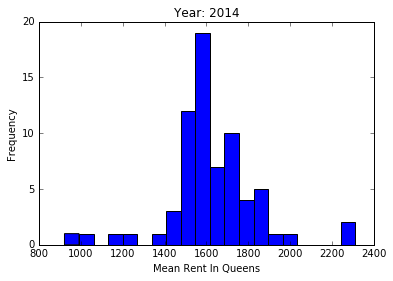

In [8]:
year = 2014
plt.plot(subplots=True)
plt.hist(df_14['Rent_Mean'].values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent In Queens')
plt.ylabel('Frequency')
plt.show()

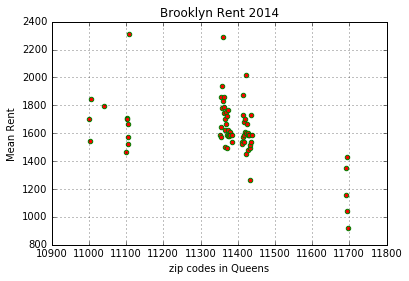

In [9]:

plt.scatter(df_14['ZIP'], df_14['Rent_Mean'],color='red', edgecolors='green')
plt.title('Brooklyn Rent 2014')
plt.xlabel('zip codes in Queens')
plt.ylabel('Mean Rent')
plt.grid()
plt.show()

In [10]:
df_13 = df_13[(df_13.CountyName == 'Queens County') & (df_13.StateName == 'New York')]
df_13 = df_13[['StateName','CountyName','rent0','rent1','rent2','rent3','rent4','ZIP']]
df_13['Rent_Mean'] = df_13[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True,axis=1)
df_13['year'] = 2013
df_13.head()
df_13.to_csv('data/Queens_Rent13.csv')

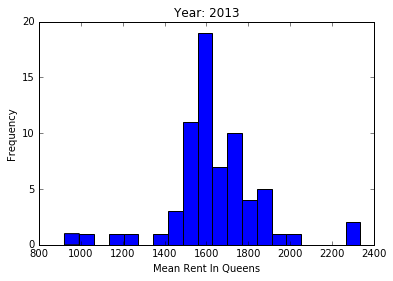

In [11]:
year = 2013
plt.plot(subplots=True)
plt.hist(df_13['Rent_Mean'].values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent In Queens')
plt.ylabel('Frequency')
plt.show()

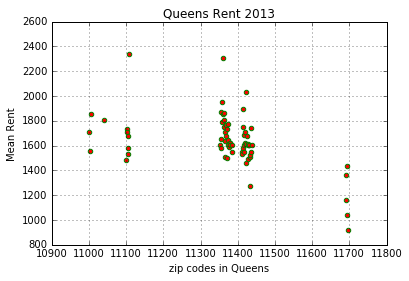

In [12]:
plt.scatter(df_13['ZIP'], df_13['Rent_Mean'],color='red', edgecolors='green')
plt.title('Queens Rent 2013')
plt.xlabel('zip codes in Queens')
plt.ylabel('Mean Rent')
plt.grid()
plt.show()

In [13]:
df_12 = df_12[(df_12.CountyName == 'Queens County') & (df_12.StateName == 'New York')]
df_12 = df_12[['StateName','CountyName','rent0','rent1','rent2','rent3','rent4','ZIP']]

In [14]:
df_12['Rent_Mean'] = df_12[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True, axis=1)
df_12['year'] = 2012
df_12.head()
df_12.to_csv('data/Queens_Rent12.csv')

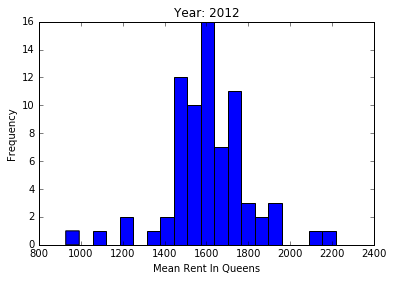

In [15]:
year = 2012
plt.plot(subplots=True)
plt.hist(df_12['Rent_Mean'].values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent In Queens')
plt.ylabel('Frequency')
plt.show()

In [16]:
df_11 = df_11[(df_11.CountyName == 'Queens County') & (df_11.state == 36)]
df_11 = df_11[['state','CountyName','rent0','rent1','rent2','rent3','rent4','ZIP']]
df_11['Rent_Mean'] = df_11[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True, axis=1)
df_11['year'] = 2011
df_11.head()
df_11.to_csv('data/Queens_Rent11.csv')

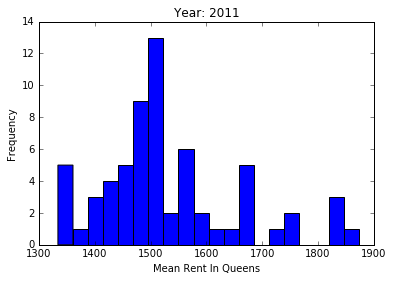

In [17]:
year = 2011
plt.plot(subplots=True)
plt.hist(df_11['Rent_Mean'].values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent In Queens')
plt.ylabel('Frequency')
plt.show()

In [18]:
df_10 = df_10[(df_10.CountyName == 'Queens County') & (df_10.StateName == 'NY')]
df_10 = df_10[['StateName','CountyName', 'rent0','rent1','rent2','rent3','rent4']]
df_10['Rent_Mean'] = df_10[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True, axis=1)
df_10['year'] = 2010
df_10.head()
df_10.to_csv('data/Queens_Rent10.csv')

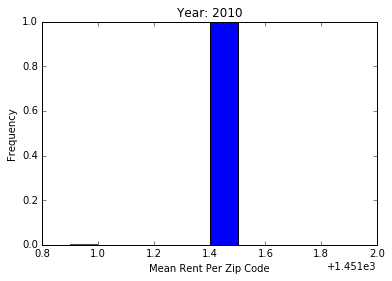

In [19]:
year = 2010
plt.plot(subplots=True)
plt.hist(df_10['Rent_Mean'].values)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent Per Zip Code')
plt.ylabel('Frequency')
plt.show()

In [20]:
dfs = {'2010': df_10.count().iloc[0], 
      '2011': df_11.count().iloc[0],
      '2012': df_12.count().iloc[0],
      '2013': df_13.count().iloc[0],
      '2014': df_14.count().iloc[0],}
Rent_in_Bk = pd.Series(dfs)
Rent_in_Bk.head()

2010     1
2011    64
2012    73
2013    68
2014    69
dtype: int64